# Test de l'api "current weather"

https://openweathermap.org/

In [1]:
import requests
response = requests.get("https://api.openweathermap.org/data/2.5/weather?q=Paris&units=metric&appid=c81f65041779b4b4cda1b9211025cec6")
response.json()

{'coord': {'lon': 2.3488, 'lat': 48.8534},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 6.67,
  'feels_like': 2.59,
  'temp_min': 6,
  'temp_max': 7.78,
  'pressure': 1029,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 4.12, 'deg': 360},
 'clouds': {'all': 90},
 'dt': 1615969292,
 'sys': {'type': 1,
  'id': 6550,
  'country': 'FR',
  'sunrise': 1615960783,
  'sunset': 1616003892},
 'timezone': 3600,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

## Amélioration : parametres de l'url

https://www.urlencoder.io/python/

In [3]:
# import urllib.parse

args = {
    "q": ["Paris"],
    "appid": "c81f65041779b4b4cda1b9211025cec6", 
    "units":"metric"
}

url = "https://api.openweathermap.org/data/2.5/weather" 
url

'https://api.openweathermap.org/data/2.5/weather'

In [16]:
data = requests.get(url, params = args).json()

In [20]:
data

{'coord': {'lon': 2.3488, 'lat': 48.8534},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 7.3,
  'feels_like': 2.79,
  'temp_min': 7,
  'temp_max': 7.78,
  'pressure': 1029,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 4.63, 'deg': 340},
 'clouds': {'all': 90},
 'dt': 1615971763,
 'sys': {'type': 1,
  'id': 6550,
  'country': 'FR',
  'sunrise': 1615960783,
  'sunset': 1616003892},
 'timezone': 3600,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

In [18]:
data['main']['temp']

7.3

In [19]:
data['main']['humidity']

81

## Interaction

In [5]:
import ipywidgets as widgets
from ipywidgets import interact

villes = ["Paris", "London", "Madrid", "Edinburgh"]

In [7]:
file = open("img/wait.png", "rb")
image = file.read()
icon = widgets.Image(
    value=image,
    format='png'
)

In [8]:
icon

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x80\x00\x00\x00\x80\x08\x06\x00\x00\x00\xc3>a\xc…

In [9]:
def change_icon(humidity = 5):
    if humidity <10 :
        icon.value = open("img/sun.png", "rb").read()
    elif humidity <75 :
        icon.value = open("img/cloud.png", "rb").read()
    else :
        icon.value = open("img/rain.png", "rb").read()

In [21]:
import urllib.parse

def get_meteo(ville, key = "c81f65041779b4b4cda1b9211025cec6", units = "metric"):
    args = {
        "q": [ville],
        "appid": key, 
        "units":units
    }

    url = "https://api.openweathermap.org/data/2.5/weather?{}".format(urllib.parse.urlencode(args, doseq=True))
    
    data = requests.get(url).json()
    
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    
    print("temp = {}°C, humidity = {}%".format(temp, humidity)) # TODO : comment retrouver temp et humidity dans le json?
    
    change_icon(data['main']['humidity']) # TODO : comment retrouver humidity dans le json?
    

In [22]:
interact(get_meteo, ville=villes);
icon

interactive(children=(Dropdown(description='ville', options=('Paris', 'London', 'Madrid', 'Edinburgh'), value=…

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x80\x00\x00\x00\x80\x08\x06\x00\x00\x00\xc3>a\xc…

## Saisir la localité à partir d'une adresse

In [24]:
import geopandas

In [25]:
#import geopandas
from geopandas.tools import geocode

def adresse_code(adresse):
    result = geocode(adresse, provider="nominatim", user_agent="meteo-api")
    return result.geometry.y, result.geometry.x # lat/lon


In [26]:
adresse_code('Simplon, Montreuil')

(0    48.854392
 dtype: float64,
 0    2.436259
 dtype: float64)

In [33]:
def get_meteo_latlon(adresse = 'Simplon, Montreuil',  units = "metric"):
    lat, lon = adresse_code(adresse)
    key = "c81f65041779b4b4cda1b9211025cec6",
    
    args = {
        "lat": lat,
        "lon": lon,
        "appid": key, 
        "units":units
    }

    url = "https://api.openweathermap.org/data/2.5/weather?{}".format(urllib.parse.urlencode(args, doseq=True))
    
    data = requests.get(url).json()
    print("temp = {}°C, humidity = {}%".format(data["main"]["temp"], data["main"]["humidity"]))
    
    change_icon(data["main"]["humidity"])

In [34]:
interact(get_meteo_latlon);
icon

interactive(children=(Text(value='Simplon, Montreuil', description='adresse'), Text(value='metric', descriptio…

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x80\x00\x00\x00\x80\x08\x06\x00\x00\x00\xc3>a\xc…

In [38]:
import folium

folium.Map(location=adresse_code('55 rue de vincennes,montreuil'), tiles='openstreetmap', zoom_start=14)

## Todo

- afficher une carte météo de plusieurs villes avec des icones de météo pour chaque ville

> indice : utiliser des [marker](https://www.python-graph-gallery.com/312-add-markers-on-folium-map) dans folium

# API "history"
https://openweathermap.org/history : celle-ci est payante

https://openweathermap.org/api/one-call-api : historique pour 5 jours gratuit

## Convertir une date en unix timezone

In [39]:
from datetime import timezone
from datetime import datetime

dt = datetime(2021, 3, 13,14,11,0)
# dt = datetime.now()

timestamp = round(dt.timestamp())
print(timestamp)

1615641060


## Test du endpoint

In [89]:
import urllib.parse
import pandas as pd


lat, lon = adresse_code('Simplon, Montreuil')

args = {
    "lat": lat,
    "lon": lon,
    "units":"metric",
    "exclude":"minutely, daily",
    "dt":timestamp,
    "appid": "c81f65041779b4b4cda1b9211025cec6"
}


url = "https://api.openweathermap.org/data/2.5/onecall/timemachine?{}".format(urllib.parse.urlencode(args, doseq=True))

data = requests.get(url).json()

In [90]:
data

{'lat': 48.8544,
 'lon': 2.4363,
 'timezone': 'Europe/Paris',
 'timezone_offset': 3600,
 'current': {'dt': 1615641060,
  'sunrise': 1615615667,
  'sunset': 1615657908,
  'temp': 10.15,
  'feels_like': 5.29,
  'pressure': 1003,
  'humidity': 76,
  'dew_point': 6.12,
  'uvi': 2.26,
  'clouds': 75,
  'visibility': 10000,
  'wind_speed': 5.66,
  'wind_deg': 270,
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}]},
 'hourly': [{'dt': 1615593600,
   'temp': 7.92,
   'feels_like': 2.3,
   'pressure': 1006,
   'humidity': 87,
   'dew_point': 5.89,
   'clouds': 75,
   'visibility': 10000,
   'wind_speed': 6.69,
   'wind_deg': 210,
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04n'}]},
  {'dt': 1615597200,
   'temp': 8.28,
   'feels_like': 0.72,
   'pressure': 1005,
   'humidity': 81,
   'dew_point': 5.22,
   'clouds': 75,
   'visibility': 10000,
   'wind_speed': 9.26,
   'wind_deg': 200,


## Création de la df à partir du json

https://www.kaggle.com/jboysen/quick-tutorial-flatten-nested-json-in-pandas

In [91]:
df_hourly = pd.json_normalize(data['hourly'])
df_hourly.head(5)

dt  temp  feels_like  pressure  humidity  dew_point  clouds  \
0  1615593600  7.92        2.30      1006        87       5.89      75   
1  1615597200  8.28        0.72      1005        81       5.22      75   
2  1615600800  8.48        1.31      1004        81       5.41      90   
3  1615604400  8.59        0.73      1002        81       5.52      90   
4  1615608000  8.51        1.35      1001        81       5.44      90   

   visibility  wind_speed  wind_deg  \
0       10000        6.69       210   
1       10000        9.26       200   
2       10000        8.75       200   
3       10000        9.77       200   
4       10000        8.75       220   

                                             weather  wind_gust  rain.1h  
0  [{'id': 803, 'main': 'Clouds', 'description': ...        NaN      NaN  
1  [{'id': 803, 'main': 'Clouds', 'description': ...        NaN      NaN  
2  [{'id': 804, 'main': 'Clouds', 'description': ...        NaN      NaN  
3  [{'id': 804, 'main': 'Clouds', 'description': ...      15.43      NaN  
4  [{'id': 804, 'main': 'Clouds', 'description': ...      14.40      NaN

In [92]:
df_hourly.shape

(24, 13)

In [93]:
df_weather = pd.json_normalize(data['hourly'], record_path='weather', meta=['dt'])
df_weather.head(5)

id    main      description icon          dt
0  803  Clouds    broken clouds  04n  1615593600
1  803  Clouds    broken clouds  04n  1615597200
2  804  Clouds  overcast clouds  04n  1615600800
3  804  Clouds  overcast clouds  04n  1615604400
4  804  Clouds  overcast clouds  04n  1615608000

## Analyse

In [94]:
df_hourly['dt'] = pd.to_datetime(df_hourly.dt,unit='s')

In [95]:
df_hourly.set_index('dt', inplace = True)

In [96]:
df_hourly.head(3)

temp  feels_like  pressure  humidity  dew_point  clouds  \
dt                                                                             
2021-03-13 00:00:00  7.92        2.30      1006        87       5.89      75   
2021-03-13 01:00:00  8.28        0.72      1005        81       5.22      75   
2021-03-13 02:00:00  8.48        1.31      1004        81       5.41      90   

                     visibility  wind_speed  wind_deg  \
dt                                                      
2021-03-13 00:00:00       10000        6.69       210   
2021-03-13 01:00:00       10000        9.26       200   
2021-03-13 02:00:00       10000        8.75       200   

                                                               weather  \
dt                                                                       
2021-03-13 00:00:00  [{'id': 803, 'main': 'Clouds', 'description': ...   
2021-03-13 01:00:00  [{'id': 803, 'main': 'Clouds', 'description': ...   
2021-03-13 02:00:00  [{'id': 804, 'main': 'Clouds', 'description': ...   

                     wind_gust  rain.1h  
dt                                       
2021-03-13 00:00:00        NaN      NaN  
2021-03-13 01:00:00        NaN      NaN  
2021-03-13 02:00:00        NaN      NaN

<AxesSubplot:xlabel='dt'>

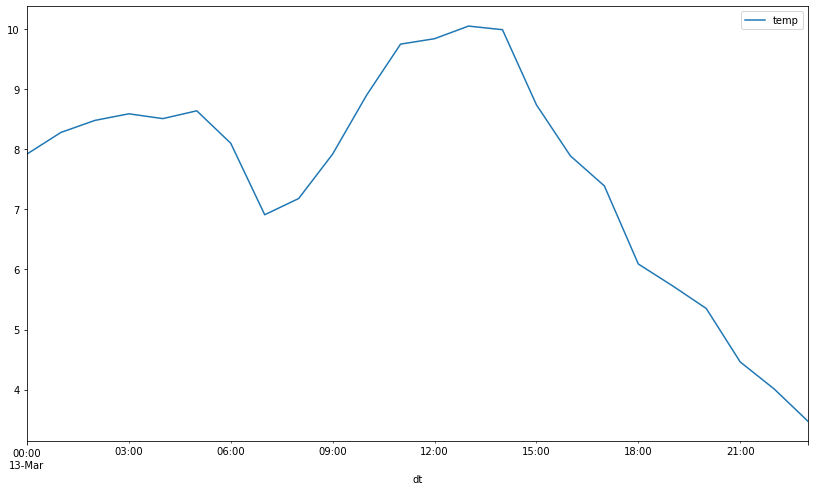

In [101]:
# df_hourly[['temp', 'humidity', 'clouds', 'wind_speed']].plot()
df_hourly[['temp']].plot()

In [98]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]

## Todo

1. Dans une même dataframe, récupérez les données de data['hourly'] pour les 5 derniers jours (il faut donc concatener les résultats
2. Affichez la courbe de température sur les 5 jours
3. Dans une autre dataframe, récupérez les sous-données de la colonne weather
4. Affichez un camembert de la répartition de la colonne "description" de weather